#1) Introdução

Este projeto visa aplicar modelos de classificação e usa como base o dataset 'iris'.
<br>
<br>

As tarefas propostas são:

* Fazer a Análise Exploratória dos Dados.
* Fazer o Pré-Processamento dos dados
* Criar a Máquina Preditiva.
* Avaliar a Máquina Preditiva.
<br>
<br>

Foram implementados 6 modelos no exercício de forma que para cada um dos modelos as predições foram realizadas ao mesmo tempo em que a validação cruzada era aplicada, através do método cross_val_predict, pelos seguintes motivos:

*  O dataset possui poucas instâncias (150). Logo, quanto menos dados forem separados, melhor o aprendizado do modelo.
*  Acredita-se que melhor do que treinar o modelo em 20% dos dados e testar nos 20% restantes, seria predizer os valores já na validação cruzada.
*  Como não será discutida a tunagem do modelo com osmelhores hiperparâmetros, o validação cruzada já poderia retornar as predições, e não as métricas.
<br>
<br>

As predições e métricas foram realizados através de iterações em uma lista de modelos. Ao fim dos cálculos, é gerado um dataset resumo das métricas de cada modelo para cada classe analisada (setosa, virgínica, versicolor)
<br>
<br>

Foram trabalhadas duas variações do dataset iris: o dataset original e o dataset com duas features excluídas, com o intuito de verificar o deempenho dos modelos.
<br>
<br>

Ressaltando novamente, não foram efetuadas otimizações de modelos através de ajuste de hiperparâmetros. Também não serão aplicadas técnicas de seleção devariáveis.
<br>
<br>

#2) Análise exploratória

In [ ]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

from sklearn.metrics import confusion_matrix,precision_score,recall_score, f1_score,accuracy_score, make_scorer

In [ ]:
# Criando o dataset
data=sns.load_dataset('iris')

# Criando backup
df=data.copy()

# Embaralhando o dataset
df=df.sample(frac=1,random_state=42)

In [ ]:
# Informações do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 73 to 102
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [ ]:
# Visualizando  linhas aleatóeias o dataset
df.sample(5)

,sepal_length,sepal_width,petal_length,petal_width,species
136,6.3,3.4,5.6,2.4,virginica
134,6.1,2.6,5.6,1.4,virginica
41,4.5,2.3,1.3,0.3,setosa
13,4.3,3.0,1.1,0.1,setosa
85,6.0,3.4,4.5,1.6,versicolor


In [ ]:
# Verificando as espécies existentes
df['species'].unique()

array(['versicolor', 'setosa', 'virginica'], dtype=object)

In [ ]:
# Verificando a contagem de cada espécie
df['species'].value_counts()

versicolor    50
setosa        50
virginica     50
Name: species, dtype: int64

Existem 50 amostras para cada espécie. Logo, os dados estão balanceados.
<br><br>

In [ ]:
#Sumarização do dataset
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
#Sumarização do dataset - filtro setosa
df[df['species']=='setosa'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.000000
mean,5.00600,3.428000,1.462000,0.246000
std,0.35249,0.379064,0.173664,0.105386
min,4.30000,2.300000,1.000000,0.100000
25%,4.80000,3.200000,1.400000,0.200000
50%,5.00000,3.400000,1.500000,0.200000
75%,5.20000,3.675000,1.575000,0.300000
max,5.80000,4.400000,1.900000,0.600000


In [ ]:
#Sumarização do dataset - filtro virginica
df[df['species']=='virginica'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.00000,50.000000,50.000000,50.00000
mean,6.58800,2.974000,5.552000,2.02600
std,0.63588,0.322497,0.551895,0.27465
min,4.90000,2.200000,4.500000,1.40000
25%,6.22500,2.800000,5.100000,1.80000
50%,6.50000,3.000000,5.550000,2.00000
75%,6.90000,3.175000,5.875000,2.30000
max,7.90000,3.800000,6.900000,2.50000


In [ ]:
#Sumarização do dataset - filtro versicolor
df[df['species']=='versicolor'].describe()

,sepal_length,sepal_width,petal_length,petal_width
count,50.000000,50.000000,50.000000,50.000000
mean,5.936000,2.770000,4.260000,1.326000
std,0.516171,0.313798,0.469911,0.197753
min,4.900000,2.000000,3.000000,1.000000
25%,5.600000,2.525000,4.000000,1.200000
50%,5.900000,2.800000,4.350000,1.300000
75%,6.300000,3.000000,4.600000,1.500000
max,7.000000,3.400000,5.100000,1.800000


Percebe-se que,filtrando por classe, a média das features 'petal_length' e 'petal_width' da classe setosa são bastante discrepantes da média dessas mesmas features para as demais classes. Isto pode indicar uma tendência de melhor acurácia dos modelos para essa classe, pois possui características mais bem definidas.
<br>
<br>

In [ ]:
# Verificando valores missing
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

<ipython-input-322-6e5927a25d36>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

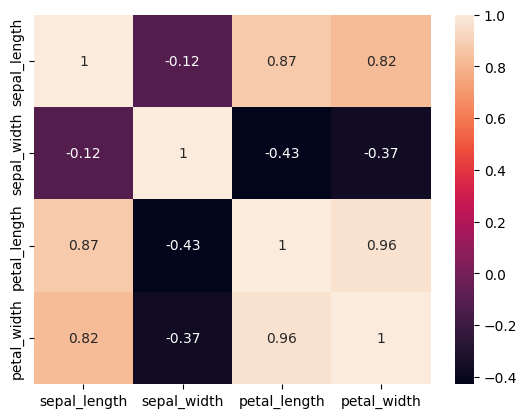

In [ ]:
# Verificando as correlações:
sns.heatmap(df.corr(),annot=True)

Com excessão da variável 'sepal_width', todas as outras variáveispossuemalta correlação entre si.
<br>
<br>

<Axes: >

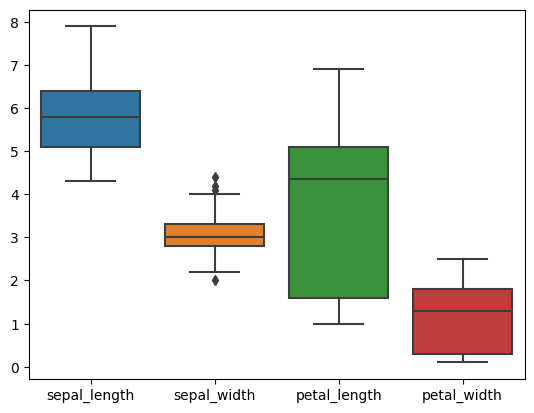

In [ ]:
# Verificando a distribuição e os outliers
sns.boxplot(df)

<Figure size 1000x800 with 0 Axes>

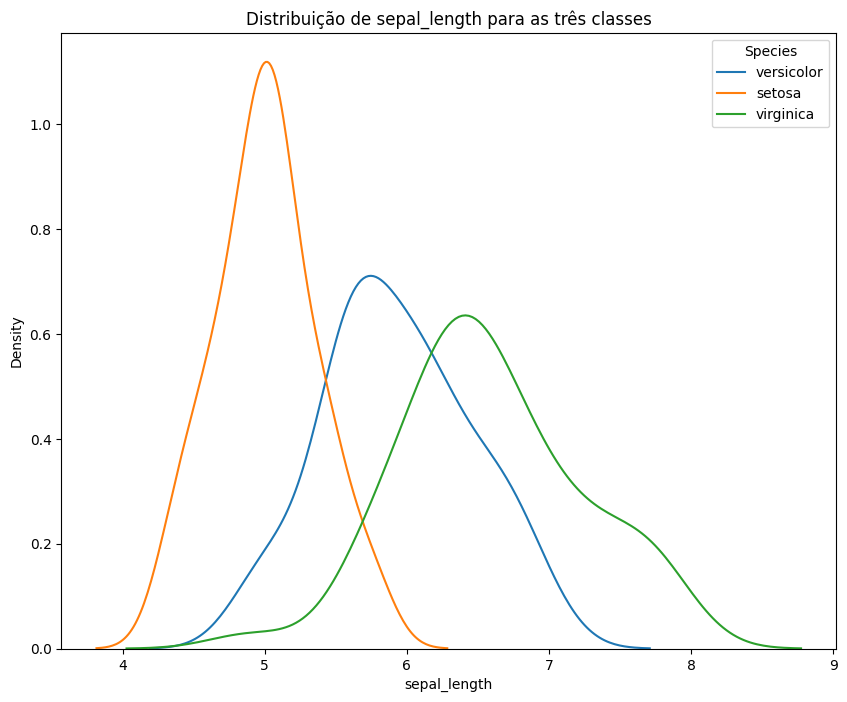

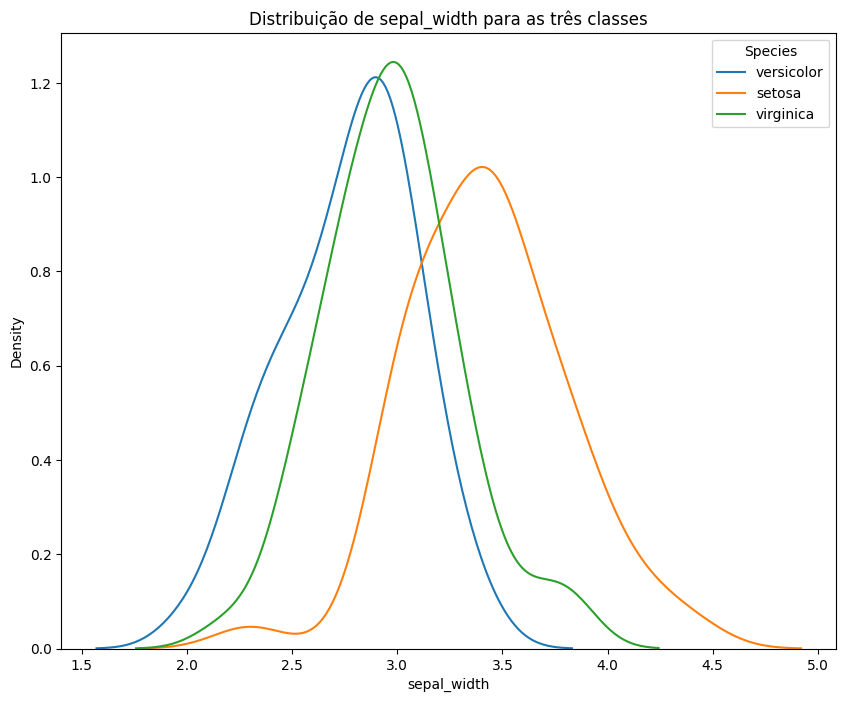

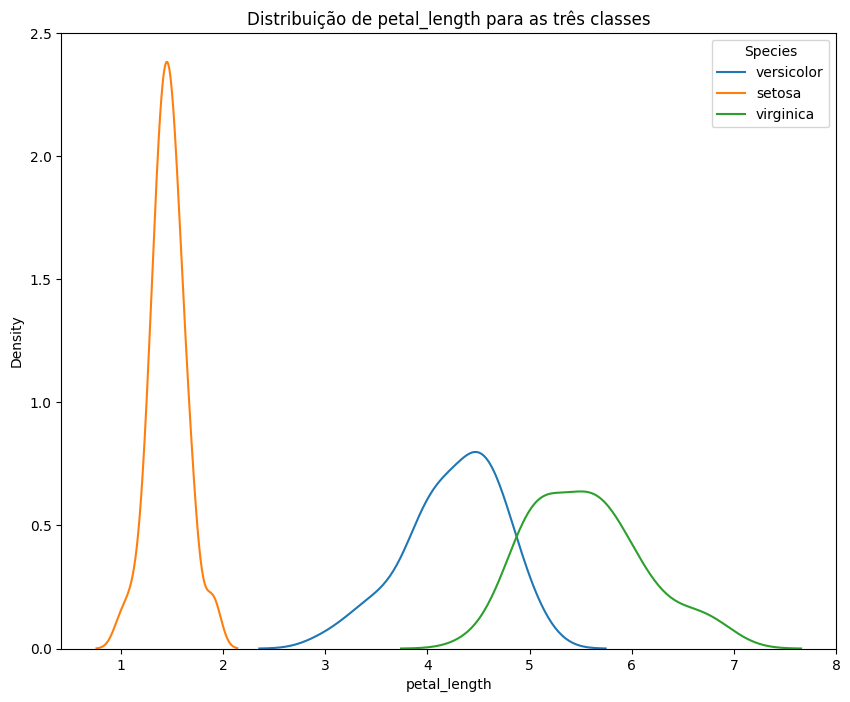

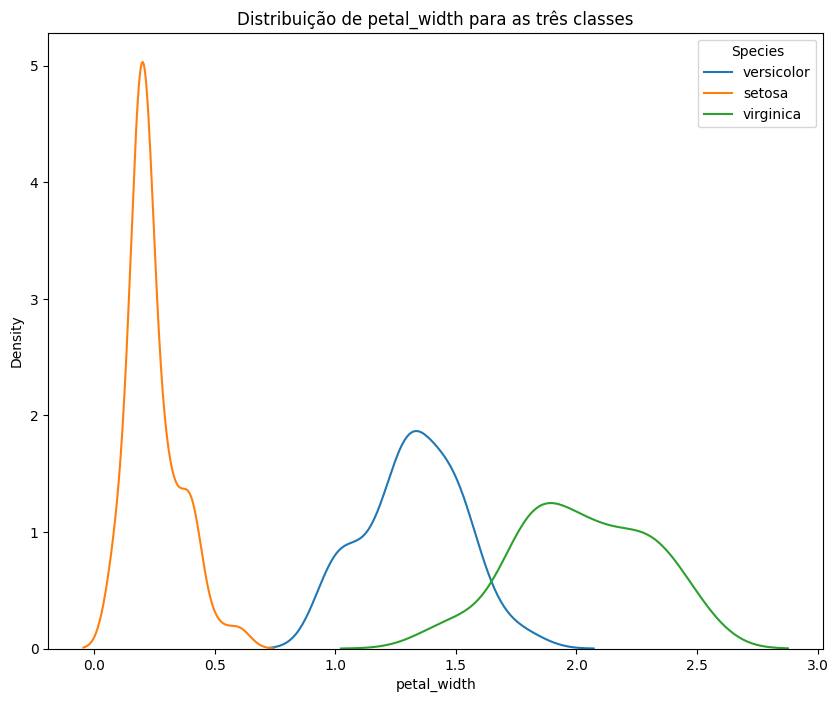

<Figure size 1000x800 with 0 Axes>

In [ ]:
# Visualizando a curva de densidade (distribuição discreta suavizada) das características de cada classe
# >>> Elaborado com o auxílio do chatGPT <<<

plt.figure(figsize=(10, 8))
features = df[1:4]

for feature in features:
    plt.figure(figsize=(10, 8))
    if feature != 'species':
      for species in df['species'].unique():
          subset = df[df['species'] == species]
          sns.kdeplot(data=subset, x=feature, label=species)

      plt.title(f'Distribuição de {feature} para as três classes')
      plt.legend(title='Species')
      plt.show()
      print('\n\n')


Navisualização dos gráficos fica clarao que a classe 'setosa' possui caraterísticas bem definidas e fáceis de serem identificadas.
<br><br>

#3) Máquina preditiva - dataset original

##Dataset original
Aqui, os modelos serão treinados com o dataset original, mesmo havendo variáveis altamente correlacionadas entre si.
<br><br>

In [ ]:
# Transformação das variáveis numéricas em categóricas

# Criando o encoder
encoder=LabelEncoder()

# treinamnto do encoder
encoder.fit(df['species'])

# Convertendo as variáveis, mantendo a coluna original
df['species_num']=encoder.transform(df['species'])

In [ ]:
# Separando os dados em X e Y

X=df.drop(['species','species_num'],axis=1)
y=df['species_num']

In [ ]:
# Normalizando os dados de treino e de teste

# Normalização
norm_scaler=MinMaxScaler()
X_norm=norm_scaler.fit_transform(X)

# Padronização
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(X)

In [ ]:
# Criando os modelos:

nb=GaussianNB()
knn=KNeighborsClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [ ]:
# Calculando as predições e métricas de cada modelo com dados normalizados

# listas vazias para as métricas
models=[nb,knn,lr,dt,rf,xgb]
y_pred=[]
accuracy=[]
recall=[]
precision=[]
f1=[]
matrix=[]

# Obtendo predições do modelo na própria validação cruzada
# obs: clasificação multiclasse (mais de duas), passar 'avarage=None'

for model in models:
  y_pred.append(cross_val_predict(model,X_norm,y,cv=5))           #predições
  accuracy.append(cross_val_score(model,X_norm,y,cv=5).mean())    #um valor de acurácia para cada fold, por isos a média
  matrix.append(confusion_matrix(y_pred[-1],y))                   #array com uma matriz de confusão para cada classe
  recall.append(recall_score(y_pred[-1],y,average=None))          #array com um recall para cada classe
  precision.append(precision_score(y_pred[-1],y,average=None))    #array com uma precisão para cada classe
  f1.append(f1_score(y_pred[-1],y,average=None))                  #array com um f1 score para cada classe

In [ ]:
# Montando um dataframe resumo
qd=pd.DataFrame()
nomes_modelos=['NaiveBayes','KNN','Logistic Regressor','DecisionTree','RandomForest','XGBoost']
qd['modelo']=nomes_modelos
qd['acuracia']=accuracy
qd['precisao']=precision
qd['recall']=recall
qd['f1 score']=f1

# Convertendo array de resultados em lista
qd[2:]=qd[2:].transform(lambda x: list(x))

# Ajustando o campo acurácia
qd['acuracia']=qd['acuracia'].transform(lambda x: str(round(100*x,2))+'%')

# Criando campos organizados
qd['precisao setosa']=qd['precisao'].transform(lambda x: str(round(100*x[0],2))+'%')
qd['recall setosa']=qd['recall'].transform(lambda x: str(round(100*x[0],2))+'%')
qd['f1 score setosa']=qd['f1 score'].transform(lambda x: str(round(100*x[0],2))+'%')

qd['precisao versicolor']=qd['precisao'].transform(lambda x: str(round(100*x[1],2))+'%')
qd['recall versicolor']=qd['recall'].transform(lambda x: str(round(100*x[1],2))+'%')
qd['f1 score versicolor']=qd['f1 score'].transform(lambda x: str(round(100*x[1],2))+'%')

qd['precisao virginica']=qd['precisao'].transform(lambda x: str(round(100*x[2],2))+'%')
qd['recall virginica']=qd['recall'].transform(lambda x: str(round(100*x[2],2))+'%')
qd['f1 score virginica']=qd['f1 score'].transform(lambda x: str(round(100*x[2],2))+'%')


qd=qd.drop(['precisao','recall','f1 score'],axis=1)

# Exibiindo o dataframe
qd

,modelo,acuracia,precisao setosa,recall setosa,f1 score setosa,precisao versicolor,recall versicolor,f1 score versicolor,precisao virginica,recall virginica,f1 score virginica
0,NaiveBayes,95.33%,100.0%,100.0%,100.0%,94.0%,92.16%,93.07%,92.0%,93.88%,92.93%
1,KNN,94.67%,100.0%,100.0%,100.0%,94.0%,90.38%,92.16%,90.0%,93.75%,91.84%
2,Logistic Regressor,92.67%,100.0%,100.0%,100.0%,86.0%,91.49%,88.66%,92.0%,86.79%,89.32%
3,DecisionTree,94.0%,100.0%,100.0%,100.0%,92.0%,90.2%,91.09%,90.0%,91.84%,90.91%
4,RandomForest,94.67%,100.0%,100.0%,100.0%,94.0%,92.16%,93.07%,92.0%,93.88%,92.93%
5,XGBoost,94.0%,100.0%,100.0%,100.0%,92.0%,90.2%,91.09%,90.0%,91.84%,90.91%


In [ ]:
# Exibindo a matriz deconfusão de cada modelo
for i in range (0,len(nomes_modelos)):
  print(f'{nomes_modelos[i]}:\n{matrix[i]}\n')

NaiveBayes:
[[50  0  0]
 [ 0 47  4]
 [ 0  3 46]]

KNN:
[[50  0  0]
 [ 0 47  5]
 [ 0  3 45]]

Logistic Regressor:
[[50  0  0]
 [ 0 43  4]
 [ 0  7 46]]

DecisionTree:
[[50  0  0]
 [ 0 46  5]
 [ 0  4 45]]

RandomForest:
[[50  0  0]
 [ 0 47  4]
 [ 0  3 46]]

XGBoost:
[[50  0  0]
 [ 0 46  5]
 [ 0  4 45]]



## Dataset modificado
Aqui, serão excluídas duas variáveis: 'petal_leght' e 'petal_width'.
<br><br>
Coincidentemente, as duas variáveis excluídas são as que mais caracerizam a classe 'setosa'. Dessa forma, espera-se que as métricas para a classe 'setosa' tenham alguma redução dos valores.
<br><br>
As duas características excluídas também são as que mais possuem correlação entre si.
<br><br>

In [ ]:
# Restaurando o dataset
df=data.copy()
df=df.drop(['petal_length','petal_width'],axis=1)

In [ ]:
# Verificando a nova matriz de correlação:
df.corr()

<ipython-input-333-dbe8d47f0e48>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,sepal_length,sepal_width
sepal_length,1.00000,-0.11757
sepal_width,-0.11757,1.00000


In [ ]:
# Transformação das variáveis numéricas em categóricas

# Criando o encoder
encoder=LabelEncoder()

# treinamnto do encoder
encoder.fit(df['species'])

# Convertendo as variáveis, mantendo a coluna original
df['species_num']=encoder.transform(df['species'])

In [ ]:
# Separando os dados em X e Y, dropando as variáveis que não serão uilizadas

X=df.drop(['species','species_num'],axis=1)
y=df['species_num']

In [ ]:
# Normalizando os dados de treino e de teste

# Normalização
norm_scaler=MinMaxScaler()
X_norm=norm_scaler.fit_transform(X)

# Padronização
std_scaler=StandardScaler()
X_std=std_scaler.fit_transform(X)

In [ ]:
# Criando os modelos:

nb=GaussianNB()
knn=KNeighborsClassifier()
lr=LogisticRegression()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
xgb=XGBClassifier()

In [ ]:
# Calculando as predições e métricas de cada modelo com dados normalizados

# listas vazias para as métricas
models=[nb,knn,lr,dt,rf,xgb]
y_pred=[]
accuracy=[]
recall=[]
precision=[]
f1=[]
matrix=[]

# Obtendo predições do modelo na própria validação cruzada
# obs: clasificação multiclasse (mais de duas), passar 'avarage=None'

for model in models:
  y_pred.append(cross_val_predict(model,X_norm,y,cv=5))           #predições
  accuracy.append(cross_val_score(model,X_norm,y,cv=5).mean())    #um valor de acurácia para cada fold, por isos a média
  matrix.append(confusion_matrix(y_pred[-1],y))                   #array com uma matriz de confusão para cada classe
  recall.append(recall_score(y_pred[-1],y,average=None))          #array com um recall para cada classe
  precision.append(precision_score(y_pred[-1],y,average=None))    #array com uma precisão para cada classe
  f1.append(f1_score(y_pred[-1],y,average=None))                  #array com um f1 score para cada classe

In [ ]:
# Montando um dataframe resumo
qd=pd.DataFrame()
nomes_modelos=['NaiveBayes','KNN','Logistic Regressor','DecisionTree','RandomForest','XGBoost']
qd['modelo']=nomes_modelos
qd['acuracia']=accuracy
qd['precisao']=precision
qd['recall']=recall
qd['f1 score']=f1

# Convertendo array de resultados em lista
qd[2:]=qd[2:].transform(lambda x: list(x))

# Ajustando o campo acurácia
qd['acuracia']=qd['acuracia'].transform(lambda x: str(round(100*x,2))+'%')

# Criando campos organizados
qd['precisao setosa']=qd['precisao'].transform(lambda x: str(round(100*x[0],2))+'%')
qd['recall setosa']=qd['recall'].transform(lambda x: str(round(100*x[0],2))+'%')
qd['f1 score setosa']=qd['f1 score'].transform(lambda x: str(round(100*x[0],2))+'%')

qd['precisao versicolor']=qd['precisao'].transform(lambda x: str(round(100*x[1],2))+'%')
qd['recall versicolor']=qd['recall'].transform(lambda x: str(round(100*x[1],2))+'%')
qd['f1 score versicolor']=qd['f1 score'].transform(lambda x: str(round(100*x[1],2))+'%')

qd['precisao virginica']=qd['precisao'].transform(lambda x: str(round(100*x[2],2))+'%')
qd['recall virginica']=qd['recall'].transform(lambda x: str(round(100*x[2],2))+'%')
qd['f1 score virginica']=qd['f1 score'].transform(lambda x: str(round(100*x[2],2))+'%')


qd=qd.drop(['precisao','recall','f1 score'],axis=1)

# Exibiindo o dataframe
qd

,modelo,acuracia,precisao setosa,recall setosa,f1 score setosa,precisao versicolor,recall versicolor,f1 score versicolor,precisao virginica,recall virginica,f1 score virginica
0,NaiveBayes,79.33%,98.0%,100.0%,98.99%,74.0%,67.27%,70.48%,66.0%,71.74%,68.75%
1,KNN,77.33%,98.0%,100.0%,98.99%,66.0%,66.0%,66.0%,68.0%,66.67%,67.33%
2,Logistic Regressor,82.0%,98.0%,98.0%,98.0%,70.0%,74.47%,72.16%,78.0%,73.58%,75.73%
3,DecisionTree,72.0%,96.0%,97.96%,96.97%,62.0%,55.36%,58.49%,54.0%,60.0%,56.84%
4,RandomForest,74.67%,96.0%,97.96%,96.97%,68.0%,60.71%,64.15%,60.0%,66.67%,63.16%
5,XGBoost,68.67%,92.0%,97.87%,94.85%,54.0%,52.94%,53.47%,60.0%,57.69%,58.82%


In [ ]:
# Exibindo a matriz deconfusão de cada modelo
for i in range (0,len(nomes_modelos)):
  print(f'{nomes_modelos[i]}:\n{matrix[i]}\n')

NaiveBayes:
[[49  0  0]
 [ 1 37 17]
 [ 0 13 33]]

KNN:
[[49  0  0]
 [ 1 33 16]
 [ 0 17 34]]

Logistic Regressor:
[[49  1  0]
 [ 1 35 11]
 [ 0 14 39]]

DecisionTree:
[[48  1  0]
 [ 2 31 23]
 [ 0 18 27]]

RandomForest:
[[48  1  0]
 [ 2 34 20]
 [ 0 15 30]]

XGBoost:
[[46  1  0]
 [ 4 27 20]
 [ 0 22 30]]



#4) Conclusões

O treinamento de vários modelos paralelamente pode ser útil na avaliação dos mais promissores. O quadro de visualização geral das métricas auxilia nesta tarefa. Nele, é possível verificar qual modelo aprenseta melhor desempenho na mértrica desejada, seja ela recall ou precisão. Porém, ressalta-se que o dataset do exercício possui um número ínfimo de instâncias e, em dataset maiores, o custo computacional pode inviabilizar o processo.
<br>
<br>
Assim, recomenda-se a avaliação inicial dos modelos mais promissores a partir das métricas extraídas da validação cruzada (acurácia), seguindo com a seleção dos modelos de melhor desempenho e sua otimização através do ajuste de hiperparâmetros.
<br>
<br>
Além disso, sempre que possível, é aconselhado separar dados exclusivamente para teste, antes de qualquer manipulação do dataframe, para que se evite ao máximo o problema de 'data leakage'.
<br>
<br>
Sobre o desempenho dos modelos no exercício, fica evidente que as métricas perfeitas (100%) atingidas para a classe 'setosa' muito provavelmente ocorreram por conta das características dessa classe que a permite ser destinguida com facilidade das outras. Ao remover as variáveis que destinguem a classe 'setosa' das demais classes, foi perceptível, assim como esperado, a queda do desempenho do modelo.
<br>
<br>